In [42]:
# Required package
!pip install sympy
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 30.7 MB/s eta 0:00:00


In [55]:
import numpy as np
from sympy import *
import control
import matplotlib.pyplot as plt

In [74]:
# Declare polynomials
s = Symbol('s')
expr_den = s*(s+1)*(s+2)
poly_den = poly(expr_den)
# Get denominator's coefficients
den_sp = poly_den.all_coeffs()
den = [int(i) for i in den_sp]


In [137]:
# Open Loop Transfer Function
k=1 # unitary gain
num = [k]
OLTF = control.tf(num,den)
print(OLTF)




        1
-----------------
s^3 + 3 s^2 + 2 s



In [138]:
# Poles
control.pzmap(OLTF, False)

(array([-2.+0.j, -1.+0.j,  0.+0.j]), array([], dtype=complex128))

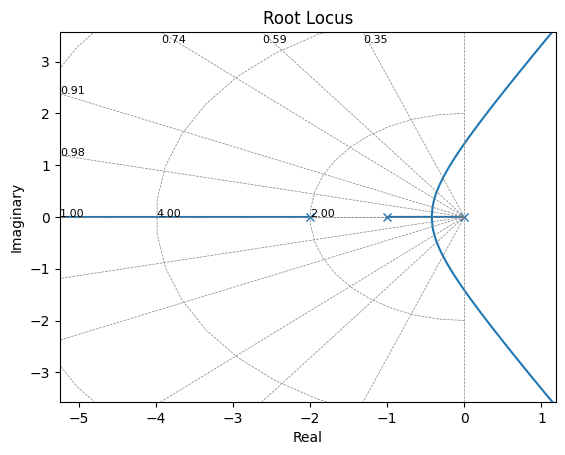

In [139]:
# Root locus
control.rlocus(OLTF)
plt.show()

In [140]:
# Close Loop Transfer Function (CLTF)

CLTF = control.feedback(OLTF,1)
print(CLTF)




          1
---------------------
s^3 + 3 s^2 + 2 s + 1



(array([-2.32471796+0.j        , -0.33764102+0.56227951j,
        -0.33764102-0.56227951j]),
 array([], dtype=complex128))

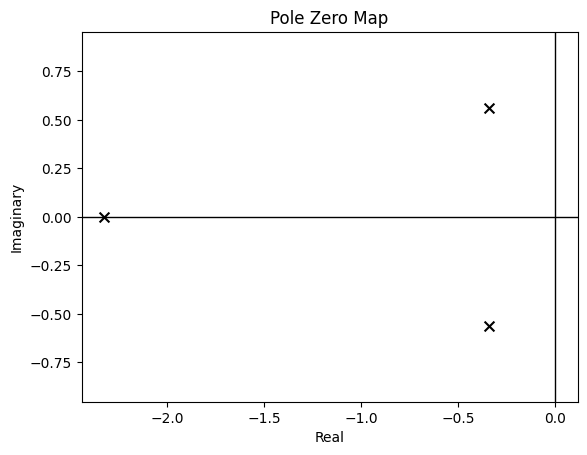

In [141]:
# CLTF Poles
control.pzmap(CLTF, True)

Text(0.5, 1.0, 'Step Response')

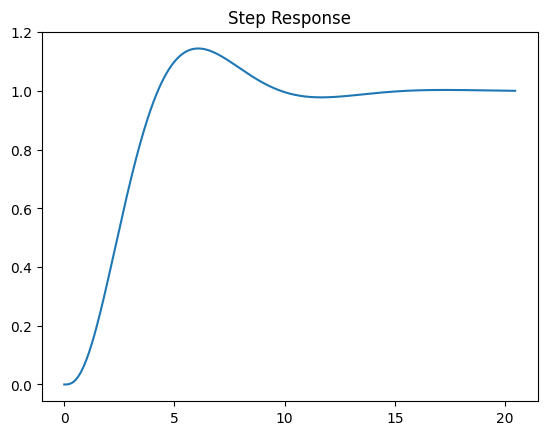

In [142]:
y,x = control.step_response(CLTF)
plt.plot(y,x)
plt.title("Step Response")